<a href="https://colab.research.google.com/github/Adrok24/NN_exercises/blob/master/plants_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile 
import os
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.download('file.csv')

Mounted at /content/drive


In [4]:
import zipfile
folder = 'drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'
plants_files_folder = "Plant_leave_diseases_dataset_without_augmentation"
with zipfile.ZipFile(folder,"r") as zip_ref:
    zip_ref.extractall("Plants")

In [5]:
base_dir = './Plants'
os.makedirs(base_dir, exist_ok=True)

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [7]:
plants_categories = os.listdir('/'.join((base_dir,plants_files_folder)))

# Creamos los directorios para las 39 clases presentes en el dataset
for directory in (train_dir, validation_dir, test_dir):
    for folder_name in plants_categories:
        class_directory = os.path.join(directory, folder_name)
        os.makedirs(class_directory, exist_ok=True)
        

In [8]:
import shutil

for plant_category in plants_categories:
    plants_pictures = os.listdir('/'.join((base_dir,plants_files_folder, plant_category)))

    #Dividimos train 80%, validation 10% y test 10%. 
    train_ds = plants_pictures[:int(len(plants_pictures)*0.8)]
#     validation_ds = plants_pictures[int(len(plants_pictures)*0.8): int(len(plants_pictures)*0.9)]
#     test_ds = plants_pictures[int(len(plants_pictures)*0.8): int(len(plants_pictures)*0.9)]


    #Copio los porcentajes de cada clase en su correspondiente carpeta
    fnames = ['image ({}).JPG'.format(i) for i in range(1,len(train_ds))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'train',plant_category, fname)
            shutil.copyfile(src, dst)
        except OSError:
            pass

    
    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.8), int(len(plants_pictures)*0.9))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'validation',plant_category, fname)
            shutil.copyfile(src, dst)      
        except:
            pass


    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.9), len(plants_pictures))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'test',plant_category, fname)
            shutil.copyfile(src, dst)
                
        except OSError:
            pass
        

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Reescalamos todas las imágenes en un factor de 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# La función flow_from_directory() toma el path a un directorio
# y genera batches de data a la que aplica las transformaciones definidas
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

Found 42208 images belonging to 39 classes.
Found 5272 images belonging to 39 classes.


In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(39, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [18]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [19]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 104s 1s/step - loss: 3.2220 - accuracy: 0.1830 - val_loss: 3.5887 - val_accuracy: 0.0000e+00
Epoch 2/30
100/100 [==============================] - 102s 1s/step - loss: 2.7950 - accuracy: 0.2540 - val_loss: 3.5389 - val_accuracy: 0.0860
Epoch 3/30
100/100 [==============================] - 101s 1s/step - loss: 2.4022 - accuracy: 0.3475 - val_loss: 2.7119 - val_accuracy: 0.2100
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 2.1122 - accuracy: 0.4370 - val_loss: 2.4310 - val_accuracy: 0.3300
Epoch 5/30
100/100 [==============================] - 101s 1s/step - loss: 1.8880 - accuracy: 0.4755 - val_loss: 2.2753 - val_accuracy: 0.3310
Epoch 6/30
100/100 [==============================] - 102s 1s/step - loss: 1.7273 - accuracy: 0.5115 - val_loss: 1.8903 - val_accuracy: 0.5010
Epoch 7/30
100/100 [==============================] - 103s 1s/step - loss: 1.6116 - accuracy: 0.5470 - val_loss: 2.4377 - val_accuracy: 0.

In [20]:
model.save('drive/My Drive/primera_prueba.h5')

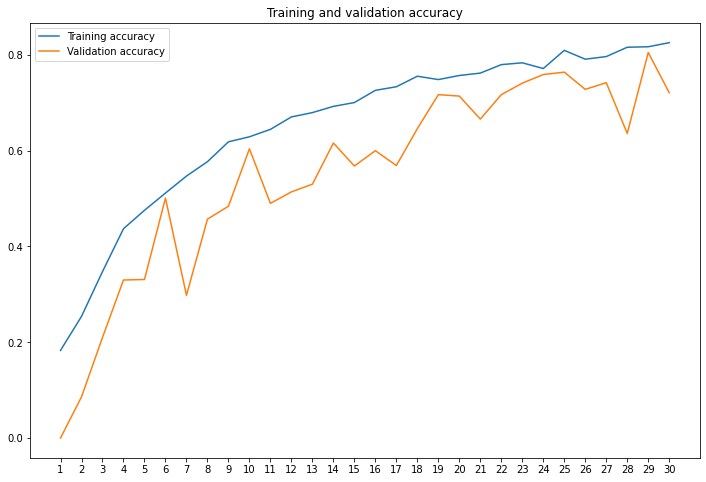

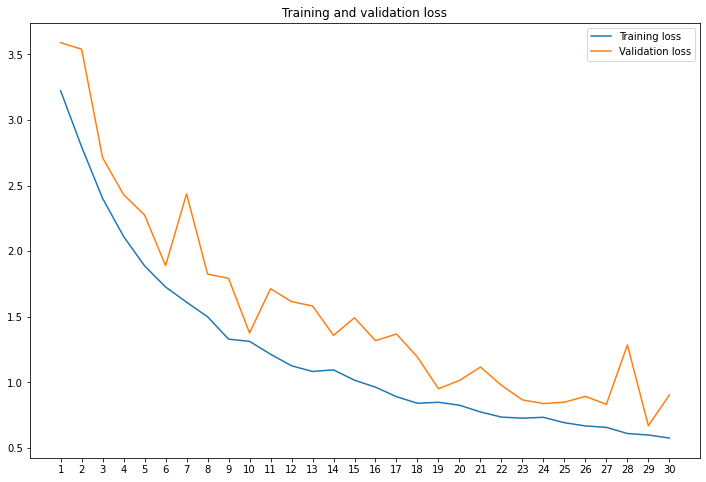

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt

Found 5288 images belonging to 39 classes.
39
Accuracy en test: 0.74
Confusion Matrix
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mit

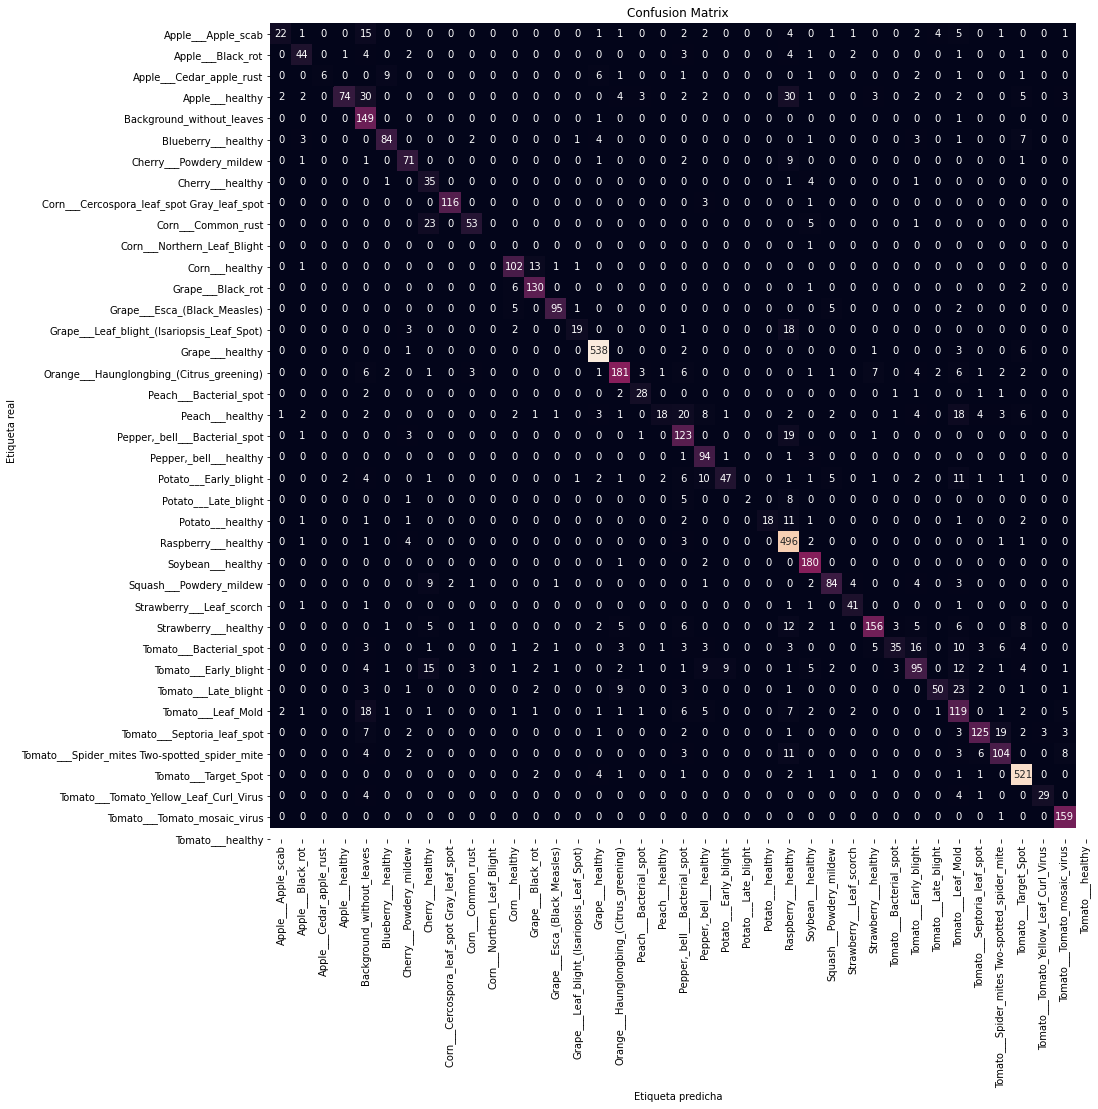

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)


labels = validation_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
tick_labels = list(labels.values())
print(len(tick_labels))
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Accuracy en test:', np.round(test_acc, 2))

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

print(tick_labels)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=tick_labels, yticklabels=tick_labels,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()




In [29]:
# # Classification report
len(tick_labels)
print('\nClassification Report:\n')
print(classification_report(test_generator.classes, y_pred, target_names=tick_labels, digits = 6, labels=range(len(tick_labels))))


Classification Report:

                                               precision    recall  f1-score   support

                           Apple___Apple_scab   0.814815  0.349206  0.488889        63
                            Apple___Black_rot   0.745763  0.698413  0.721311        63
                     Apple___Cedar_apple_rust   1.000000  0.214286  0.352941        28
                              Apple___healthy   0.961039  0.448485  0.611570       165
                    Background_without_leaves   0.000000  0.000000  0.000000         0
                          Blueberry___healthy   0.575290  0.986755  0.726829       151
                      Cherry___Powdery_mildew   0.848485  0.792453  0.819512       106
                             Cherry___healthy   0.780220  0.825581  0.802260        86
   Corn___Cercospora_leaf_spot Gray_leaf_spot   0.384615  0.833333  0.526316        42
                           Corn___Common_rust   0.983051  0.966667  0.974790       120
                 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
